In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from nbodykit.lab import *
from nbodykit.source.catalog import ArrayCatalog
from nbodykit import setup_logging, style

import os
import matplotlib.pyplot as plt
plt.style.use(style.notebook)

import numpy as np

In [3]:
setup_logging() # turn on logging to screen

In [4]:
#redshift = 0.5
#cosmo = cosmology.Planck15
LBox = 1024.0
Nparticles = 1024*1024*1024
print(Nparticles)

1073741824


In [5]:
# define download dir for the data to the current directory
download_dir = "../../../../halo_catalogues/F6/box1/27"
#download_dir = "/Users/mar/Research/Codigos/NagBody_pkg/NagBody_sources/colas/mglpicola_fofr/runs/mglpicola_fofr/B0256_P0256_M0256_testing/F5/box5001/output/."
#download_dir = "/Users/mar/Research/Codigos/NagBody_pkg/NagBody_sources/colas/mglpicola_fofr/runs/mglpicola_fofr/B0256_P0256_M0256/F5/box5001/output/."
#download_dir = "./gadget_data_27"

In [6]:
# NOTE: change this path if you downloaded the data somewhere else!
data_path = os.path.join(download_dir, 'Rockstar_M200c_F6_B1_B1024_NP1024_S27.dat')
#data_path = os.path.join(download_dir, 'snapshot_z0p000.*')
#data_path = os.path.join(download_dir, 'gadget.*')


# initialize the Gadget1 catalog objects for data and randoms
#data = Gadget1Catalog(data_path)

# Reading file
inputFile = np.loadtxt(data_path)

massvec=inputFile[:,2]
npvec=inputFile[:,7]
xvec=inputFile[:,8]
yvec=inputFile[:,9]
zvec=inputFile[:,10]
nval=massvec.shape[0]
npvecsum = np.sum(npvec)
print(nval)
print(npvecsum)
print(npvecsum/Nparticles)

#for i in range(0,nval):
#    xvec[i] = xvec[i]/LBox
#    yvec[i] = yvec[i]/LBox
#    zvec[i] = zvec[i]/LBox

arraya=np.array([xvec,yvec,zvec])
arrayb=np.transpose(arraya)
print arrayb

# generate the fake data
#data = numpy.empty(1024, dtype=[('Position', ('f8', 3)), ('Mass', 'f8')])
#data['Position'] = numpy.random.random(size=(1024, 3))
#data['Mass'] = numpy.random.random(size=1024)

data = numpy.empty(nval, dtype=[('Position', ('f8', 3)), ('Mass', 'f8')])
data['Position'] = arrayb
data['Mass'] = massvec


print(data['Mass'])
print(data['Position'])



2088610
272286591.0
0.2535866489633918
[[   5.05451   27.90979    7.1484 ]
 [   3.33114    2.02789    8.77102]
 [   6.93523   23.87998    3.54353]
 ...
 [1012.35187 1023.24255 1010.75012]
 [1018.56238 1010.28809 1012.22632]
 [1017.27716 1014.47455 1012.68018]]
[2.886e+12 3.665e+12 1.404e+12 ... 2.418e+12 1.560e+11 2.184e+12]
[[   5.05451   27.90979    7.1484 ]
 [   3.33114    2.02789    8.77102]
 [   6.93523   23.87998    3.54353]
 ...
 [1012.35187 1023.24255 1010.75012]
 [1018.56238 1010.28809 1012.22632]
 [1017.27716 1014.47455 1012.68018]]


We can analyze the available columns in the catalogs via the ``columns`` attribute:

In [7]:
#print('data columns = ', data.columns)
# save to a npy file
numpy.save("npy-data.npy", data)

rdata = numpy.load("npy-data.npy")

# initialize the catalog
fdattmp = ArrayCatalog(rdata)

print(fdattmp)
print("columns = ", fdattmp.columns) # default Weight,Selection also present
print("total size = ", fdattmp.csize)


fdata = ArrayCatalog({'Position' : data['Position'], 'Mass' : data['Mass'] })

print(fdata)
print("columns = ", fdata.columns) # default Weight,Selection also present
print("total size = ", fdata.csize)

ArrayCatalog(size=2088610)
('columns = ', ['Mass', 'Position', 'Selection', 'Value', 'Weight'])
('total size = ', 2088610)
ArrayCatalog(size=2088610)
('columns = ', ['Mass', 'Position', 'Selection', 'Value', 'Weight'])
('total size = ', 2088610)


In [8]:
ri = 0.01
rf = 100.0
Nr = 30
dr = (rf-ri)/int(Nr)
#redges = np.arange(ri,rf,dr)
redges = numpy.linspace(ri, rf, Nr+1) # 20 total bins
print(redges)
#MyBoxSize1 = data.attrs['MyBoxSize']

[1.0000e-02 3.3430e+00 6.6760e+00 1.0009e+01 1.3342e+01 1.6675e+01
 2.0008e+01 2.3341e+01 2.6674e+01 3.0007e+01 3.3340e+01 3.6673e+01
 4.0006e+01 4.3339e+01 4.6672e+01 5.0005e+01 5.3338e+01 5.6671e+01
 6.0004e+01 6.3337e+01 6.6670e+01 7.0003e+01 7.3336e+01 7.6669e+01
 8.0002e+01 8.3335e+01 8.6668e+01 9.0001e+01 9.3334e+01 9.6667e+01
 1.0000e+02]


In [9]:
tpc = SimulationBox2PCF(mode='1d',data1=fdata,edges=redges,BoxSize=[LBox,LBox,LBox],periodic=True,position='Position')

[ 000106.80 ]   0: 10-17 08:23  SimulationBoxPairCount INFO     using cpu grid decomposition: (1, 1, 1)
[ 000108.28 ]   0: 10-17 08:23  SimulationBoxPairCount INFO     correlating 2088610 x 2088610 objects in total
[ 000108.28 ]   0: 10-17 08:23  SimulationBoxPairCount INFO     correlating A x B = 2088610 x 2088610 objects (median) per rank
[ 000108.28 ]   0: 10-17 08:23  SimulationBoxPairCount INFO     min A load per rank = 2088610
[ 000108.28 ]   0: 10-17 08:23  SimulationBoxPairCount INFO     max A load per rank = 2088610
[ 000108.28 ]   0: 10-17 08:23  SimulationBoxPairCount INFO     (even distribution would result in 2088610 x 2088610)
[ 000108.33 ]   0: 10-17 08:23  MPICorrfuncCallable INFO     calling function 'Corrfunc.theory.DD.DD'


In [10]:
print(tpc)
print(tpc.D1D2)
print(tpc.R1R2)
print(tpc.corr)
tpcf=tpc.corr
print(tpcf.coords)

<BinnedStatistic: dims: (r: 30), variables: ('r', 'npairs', 'wnpairs')>
<WedgeBinnedStatistic: dims: (r: 30), variables: ('npairs', 'wnpairs')>
<WedgeBinnedStatistic: dims: (r: 30), variables: ('corr', 'r')>
{'r': array([ 1.6765,  5.0095,  8.3425, 11.6755, 15.0085, 18.3415, 21.6745,
       25.0075, 28.3405, 31.6735, 35.0065, 38.3395, 41.6725, 45.0055,
       48.3385, 51.6715, 55.0045, 58.3375, 61.6705, 65.0035, 68.3365,
       71.6695, 75.0025, 78.3355, 81.6685, 85.0015, 88.3345, 91.6675,
       95.0005, 98.3335])}


In [11]:
rvec=tpcf['r']
tpcfvec=tpcf['corr'].real

#print(kvec[3])
#print(pkvec[3])

nr = rvec.shape[0]

print(nr)

tpcfa=np.array([rvec,tpcfvec])
tpcfb=np.transpose(tpcfa)
print tpcfb

np.savetxt('2pcf.dat',tpcfb,delimiter='\t',newline='\r\n')

30
[[1.99434680e+00 6.19025447e+00]
 [5.20534319e+00 1.40167419e+00]
 [8.49177216e+00 6.37442748e-01]
 [1.17959472e+01 3.63367358e-01]
 [1.51100675e+01 2.31106372e-01]
 [1.84282263e+01 1.56868629e-01]
 [2.17506723e+01 1.11653881e-01]
 [2.50753090e+01 8.17705459e-02]
 [2.84012498e+01 6.11939890e-02]
 [3.17286293e+01 4.70372832e-02]
 [3.50568381e+01 3.67239465e-02]
 [3.83861020e+01 2.89868861e-02]
 [4.17152599e+01 2.25986082e-02]
 [4.50455450e+01 1.79776214e-02]
 [4.83760406e+01 1.40251981e-02]
 [5.17066960e+01 1.12923462e-02]
 [5.50375012e+01 8.73922073e-03]
 [5.83687080e+01 6.80841066e-03]
 [6.17002653e+01 5.34959011e-03]
 [6.50317259e+01 4.41108988e-03]
 [6.83631926e+01 3.60228098e-03]
 [7.16952499e+01 2.84076997e-03]
 [7.50270187e+01 2.29144695e-03]
 [7.83590785e+01 1.82638070e-03]
 [8.16911835e+01 1.62443007e-03]
 [8.50230976e+01 1.12852973e-03]
 [8.83554919e+01 1.02005783e-03]
 [9.16876323e+01 1.14587092e-03]
 [9.50201125e+01 1.21051973e-03]
 [9.83524900e+01 1.39808211e-03]]


In [12]:
# print out the meta-data
for i in tpcf.attrs:
    print("%s = %s" %(i, str(tpcf.attrs[i])))

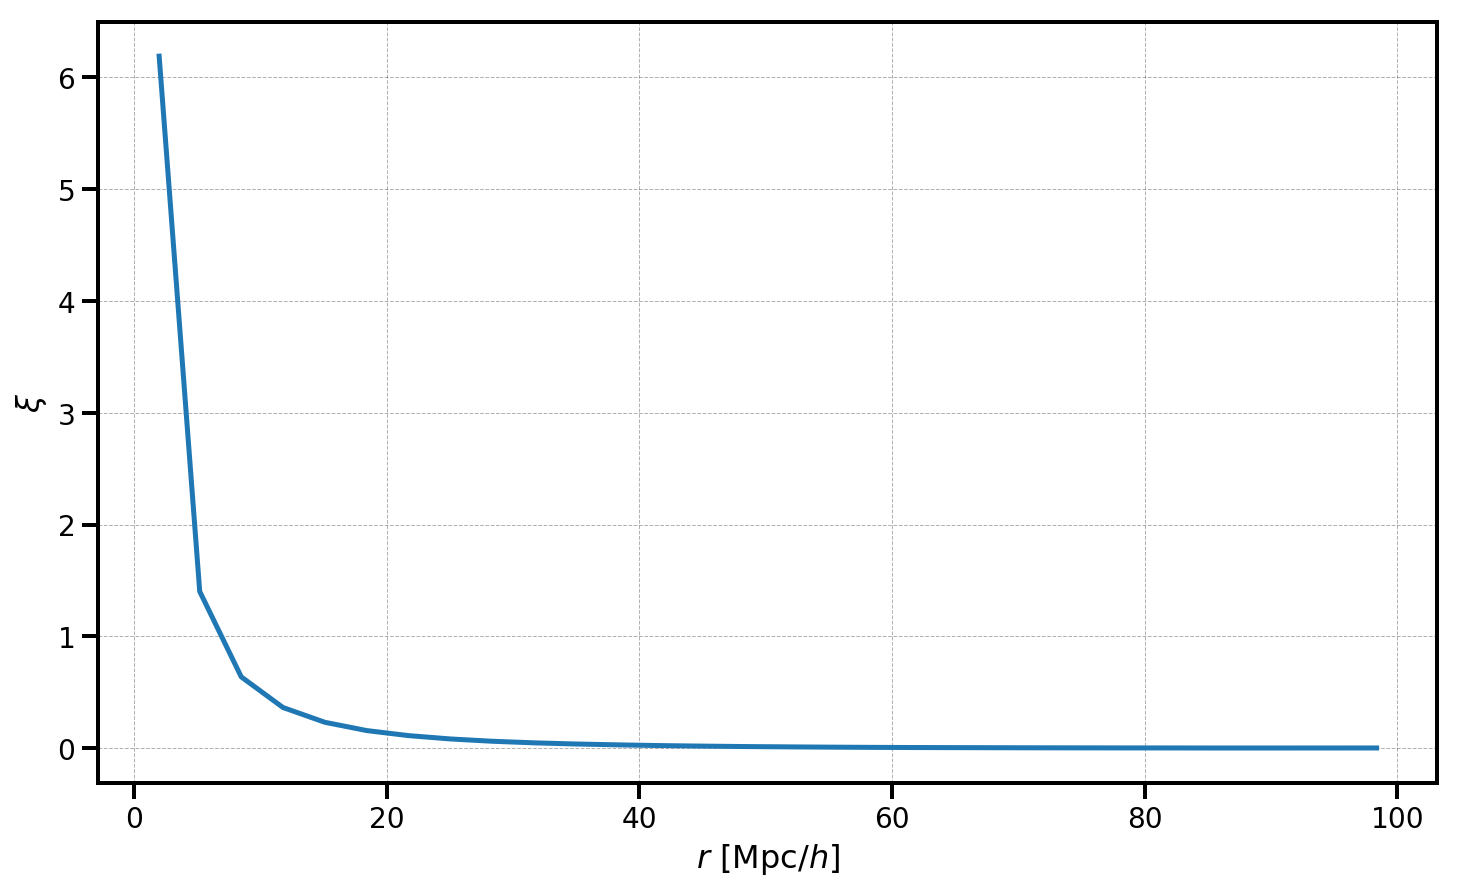

In [14]:
fig1 = plt.figure()

# print the shot noise subtracted P(k)
plt.plot(tpcf['r'], tpcf['corr'])
#plt.loglog(Pk['k'], Pk['power'].real)


# format the axes
plt.xlabel(r"$r$ [$\mathrm{Mpc}/h$]")
plt.ylabel(r"$\xi$")
#plt.xlim(0.001, 0.6)
#plt.xlim(0.01, 10.0)
#plt.ylim(1,100000)

fig1.savefig("2pcf.pdf")